<a href="https://colab.research.google.com/github/anoushka1405/AI-ML-2/blob/Issue%239---Bitcoin-Price-prediction/Bitcoin%20Price%20Prediction/Bitcoin%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/MyDrive/bitcoin_dataset.csv')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/drive/MyDrive/bitcoin_dataset.csv')

In [ ]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [ ]:
data.columns

Index(['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

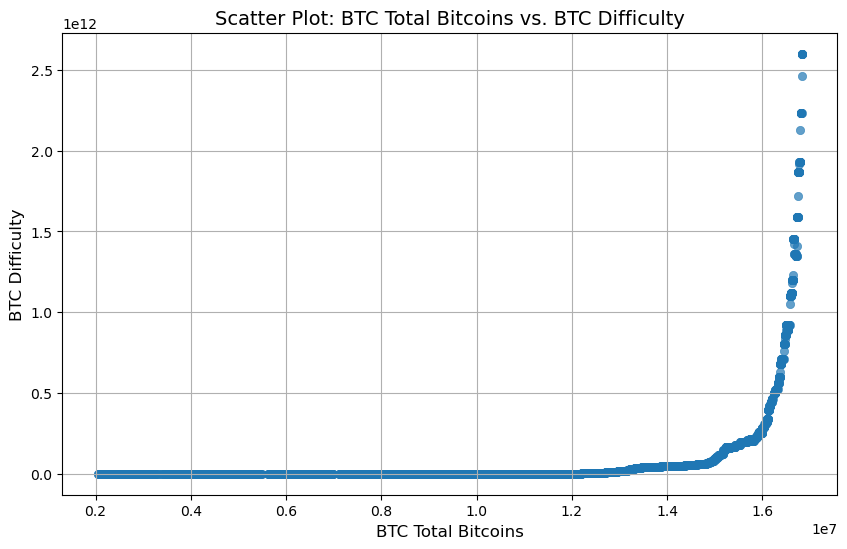

In [ ]:
# ISSUE_1 - plot scatter plot between btc_total_bitcoins & btc_difficult
plt.figure(figsize=(10, 6))

sns.scatterplot( x=data['btc_total_bitcoins'], y=data['btc_difficulty'], alpha=0.7, edgecolor=None)

plt.title('Scatter Plot: BTC Total Bitcoins vs. BTC Difficulty', fontsize=14)
plt.xlabel('BTC Total Bitcoins', fontsize=12)
plt.ylabel('BTC Difficulty', fontsize=12)
plt.grid(True)

plt.show()

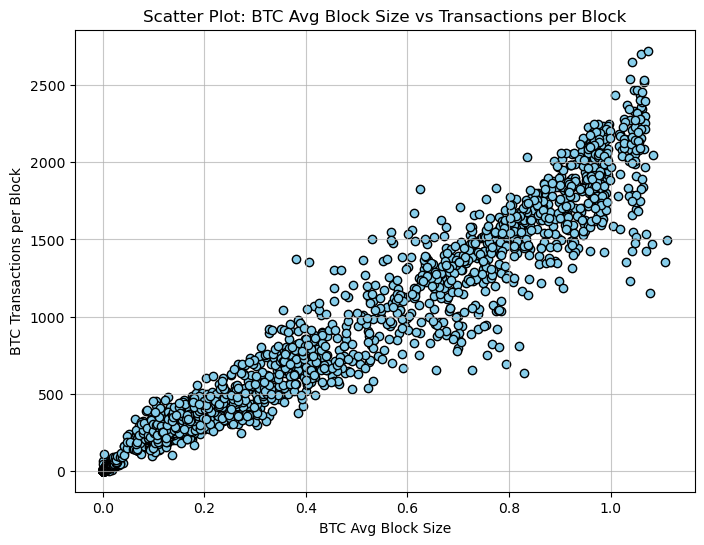

In [ ]:
# ISSUE_2 - plot scatter plot between btc_avg_block_size & btc_n_transactions_per_block
plt.figure(figsize=(8, 6))
plt.scatter(data['btc_avg_block_size'], data['btc_n_transactions_per_block'], color='skyblue', edgecolor='black')


plt.title('Scatter Plot: BTC Avg Block Size vs Transactions per Block')
plt.xlabel('BTC Avg Block Size') #label on x-axis
plt.ylabel('BTC Transactions per Block')#label on y-axis

# gridlines
plt.grid(True, alpha=0.7)

# Displays the plot
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [ ]:
data.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866841e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


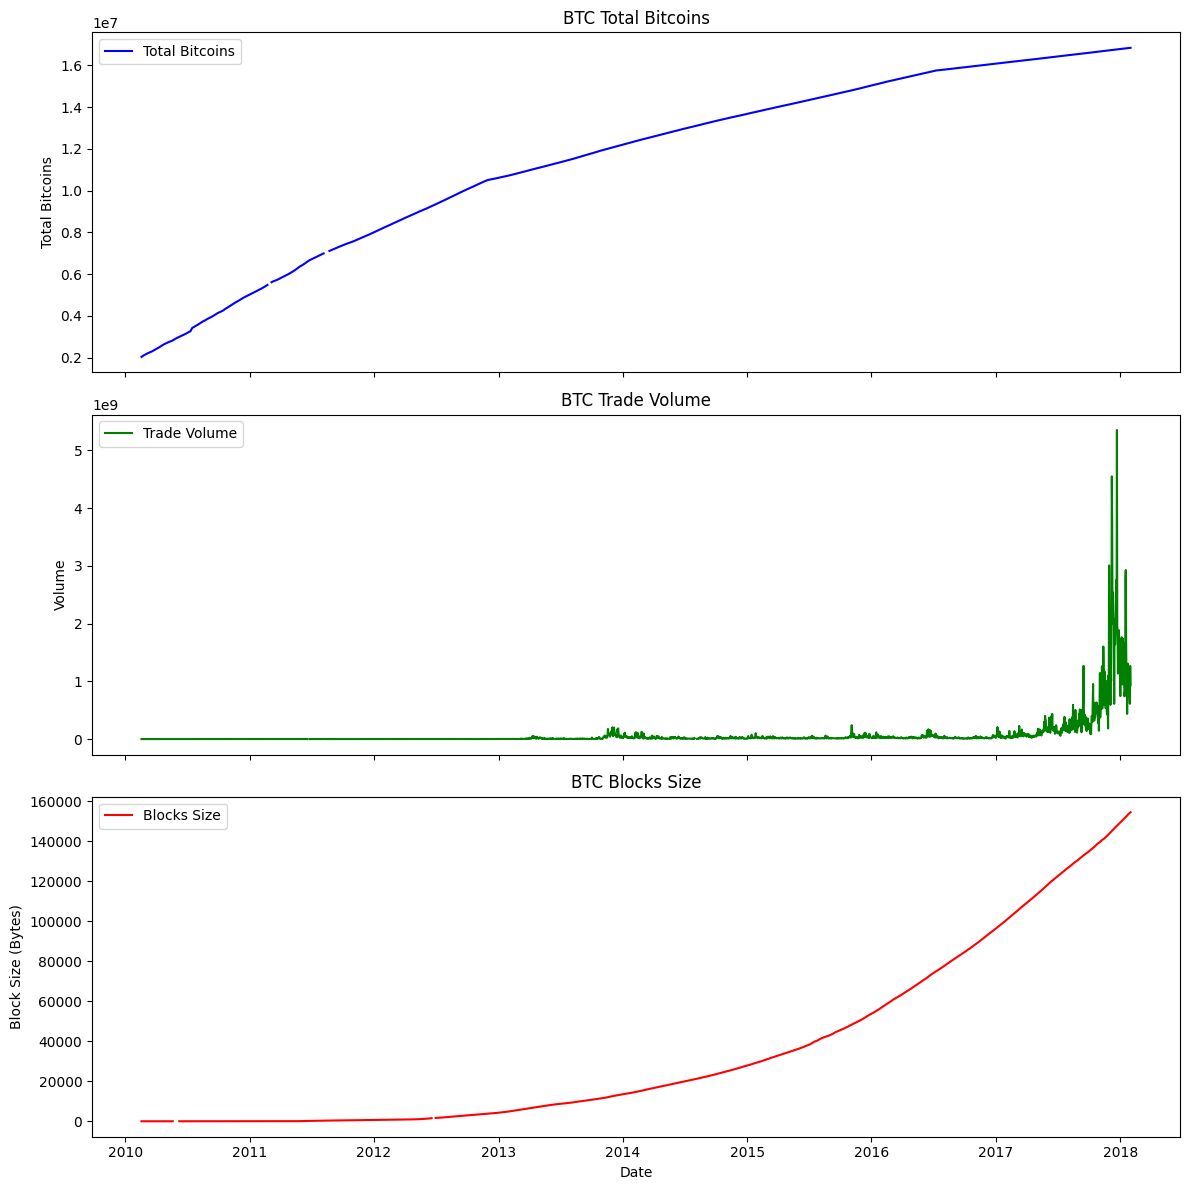

In [ ]:
# ISSUE_3 - visualize the trends of btc_total_bitcoins, btc_trade_volume, and btc_blocks_size using subplots in matplotlib
import pandas as pd
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])

fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot btc_total_bitcoins
axes[0].plot(data['Date'], data['btc_total_bitcoins'], color='blue', label='Total Bitcoins')
axes[0].set_title('BTC Total Bitcoins')
axes[0].set_ylabel('Total Bitcoins')
axes[0].legend()

# Plot btc_trade_volume
axes[1].plot(data['Date'], data['btc_trade_volume'], color='green', label='Trade Volume')
axes[1].set_title('BTC Trade Volume')
axes[1].set_ylabel('Volume')
axes[1].legend()

# Plot btc_blocks_size
axes[2].plot(data['Date'], data['btc_blocks_size'], color='red', label='Blocks Size')
axes[2].set_title('BTC Blocks Size')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Block Size (Bytes)')
axes[2].legend()

plt.tight_layout()
plt.show()



Text(0, 0.5, 'Fees')

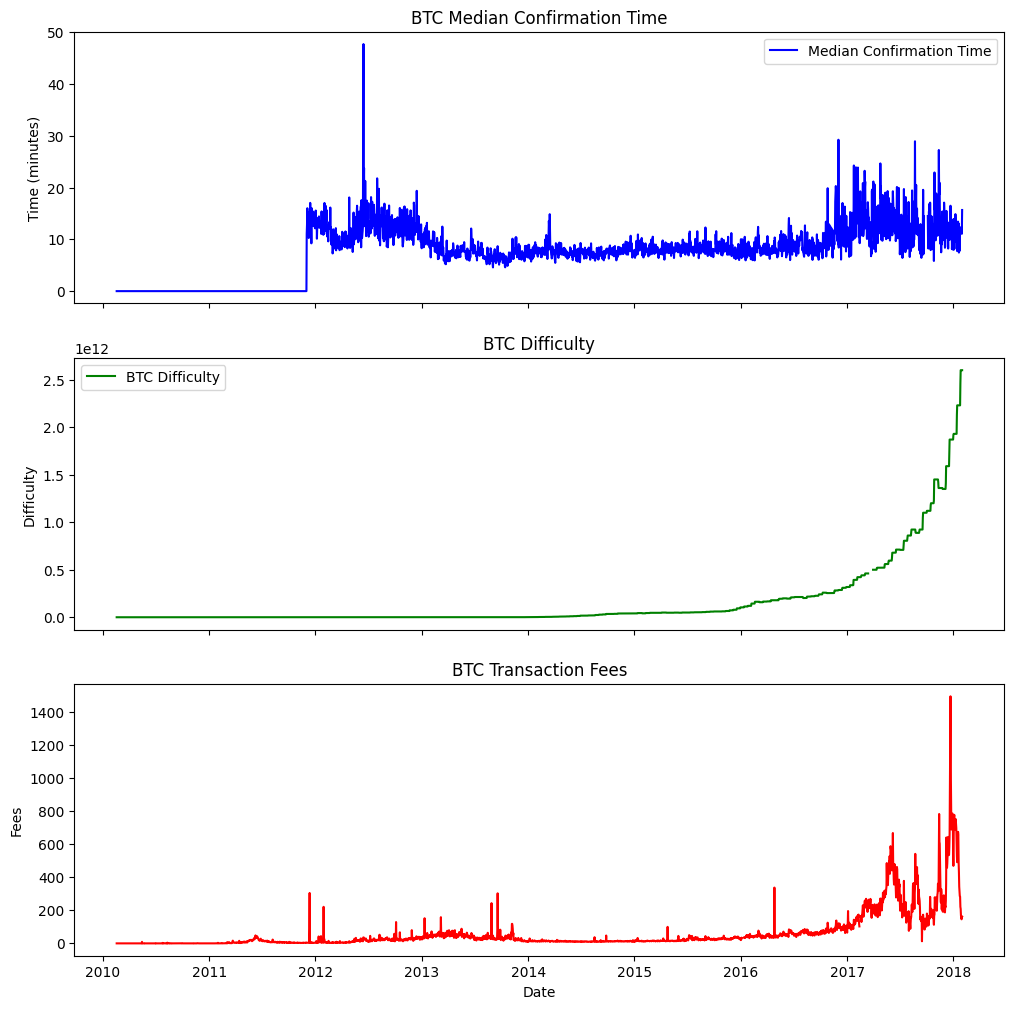

In [ ]:
# ISSUE_4 - visualize the trends of btc_median_confirmation_time, btc_difficulty, and btc_transaction_fees using subplots
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is loaded into a DataFrame called data
# Replace 'path_to_csv' with the actual path to your CSV file
#data = pd.read_csv('path_to_csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot btc_median_confirmation_time
axes[0].plot(data['Date'], data['btc_median_confirmation_time'], color='blue', label='Median Confirmation Time')
axes[0].set_title('BTC Median Confirmation Time')
axes[0].set_ylabel('Time (minutes)')
axes[0].legend()

# Plot btc_difficulty
axes[1].plot(data['Date'], data['btc_difficulty'], color='green', label='BTC Difficulty')
axes[1].set_title('BTC Difficulty')
axes[1].set_ylabel('Difficulty')
axes[1].legend()

# Plot btc_transaction_fees
axes[2].plot(data['Date'], data['btc_transaction_fees'], color='red', label='Transaction Fees')
axes[2].set_title('BTC Transaction Fees')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Fees')


In [3]:
# ISSUE_5 - check for mssing values use ffill method

print('Null values before filling:')
print(data.isnull().sum())

# Filling missing values with the mean for numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    data[column].fillna(data[column].mean(), inplace=True)

# Fill missing values with the mode for non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
for column in non_numeric_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Check again to confirm null values are filled
print('Null values after filling:')
print(data.isnull().sum())


Null values before filling:
Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                      

<ipython-input-3-4e8b9db8480e>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
<ipython-input-3-4e8b9db8480e>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
# ISSUE_6 - plot heatmap

In [4]:
# ISSUE_7 - Scale X using MinMaxScaler , drop irrelevent columns and split into train:test::80:20

#Only scaling with numeric columns here. (Excluding Date)
numeric_columns = data.select_dtypes(include=["number"]).columns
scaler = MinMaxScaler()

#Creating a copy so that the original data column can remain the same
df_scaled = data.copy()
df_scaled[numeric_columns] = scaler.fit_transform(data[numeric_columns])

<Axes: >

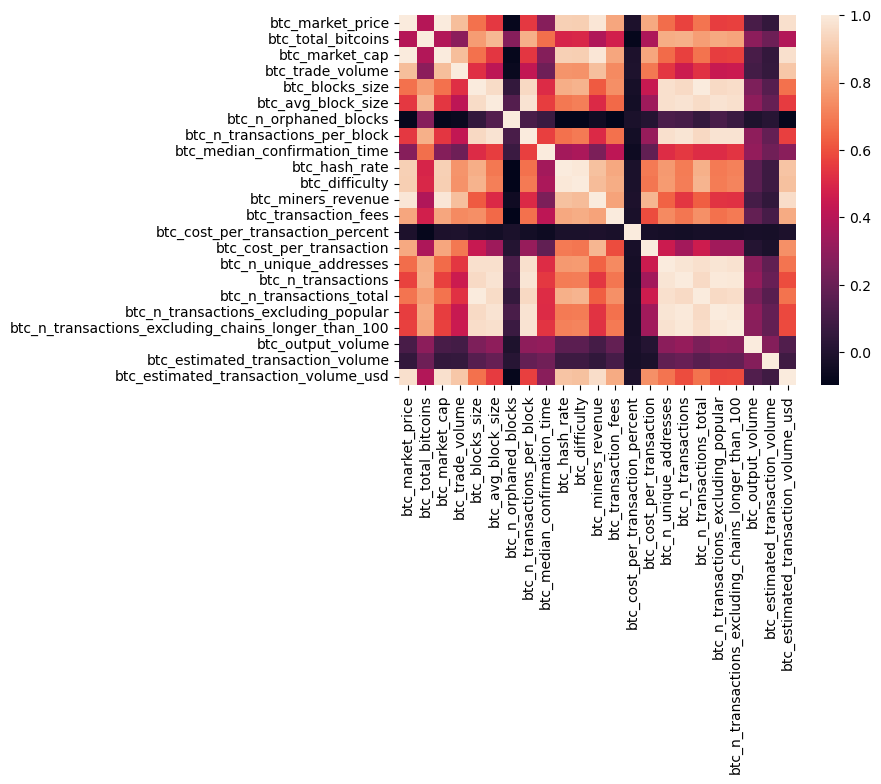

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(numeric_only=True))

Since we are not doing any real-time data analysis, the date column is useless.

If we are trying to predict the btc_market_price column, then we must look into its correlation with the other attributes in order to identify the necessary columns.

The heatmap reveals that the following columns are unnecessary: btc_n_orphaned_blocks, btc_cost_per_transaction_percent, btc_output_volume and btc_estimated_transaction_volume_usd.

In [5]:
data.drop(columns = ['btc_n_orphaned_blocks', 'btc_cost_per_transaction_percent', 'btc_output_volume', 'btc_estimated_transaction_volume_usd'], axis= 1, inplace=True)

In [6]:
X = data.drop('btc_market_price', axis=1)
y = data['btc_market_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Linear Regression

In [ ]:
# ISSUE_8 - Implement Linear regression & print train and test score




Ridge Regression

In [8]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Now, convert 'Date' to numeric format (timestamp, seconds since epoch)
data['Date'] = data['Date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)

# Check if the conversion was successful
print(data['Date'].head())

0    1.266365e+09
1    1.266451e+09
2    1.266538e+09
3    1.266624e+09
4    1.266710e+09
Name: Date, dtype: float64


In [14]:
# ISSUE_9 - Implement Ridge regression & print train and test score

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
ridge_model.fit(X_train, y_train)

train_score = ridge_model.score(X_train, y_train)
test_score = ridge_model.score(X_test, y_test)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")



Train Score: 0.9999126095346416
Test Score: 0.9998979136314843


SVM

In [ ]:
# ISSUE_10 - Implement SVM (regression) & print train and test score


